# Granger Causality

In [ ]:
# load data_final/combined_data.csv

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

df = pd.read_csv('data_final/with_xal.csv')
pred_path = 'predictions/predictions_Prophet/'
if not os.path.exists(pred_path):
    os.makedirs(pred_path)

Crude Oil Price


c:\Users\helle\anaconda3\envs\doron_env\Lib\site-packages\statsmodels\tsa\stattools.py:1488: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(


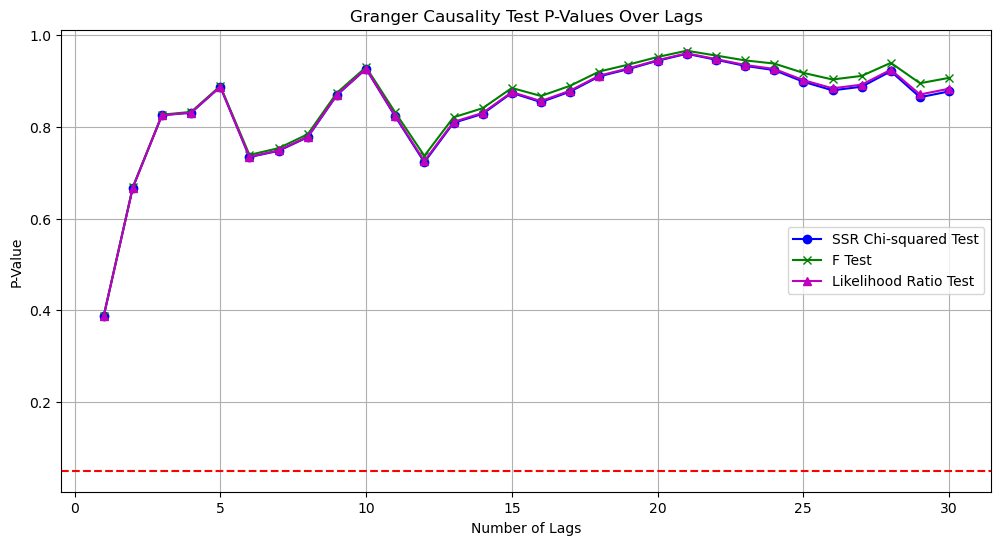

Jet Fuel Price


c:\Users\helle\anaconda3\envs\doron_env\Lib\site-packages\statsmodels\tsa\stattools.py:1488: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(


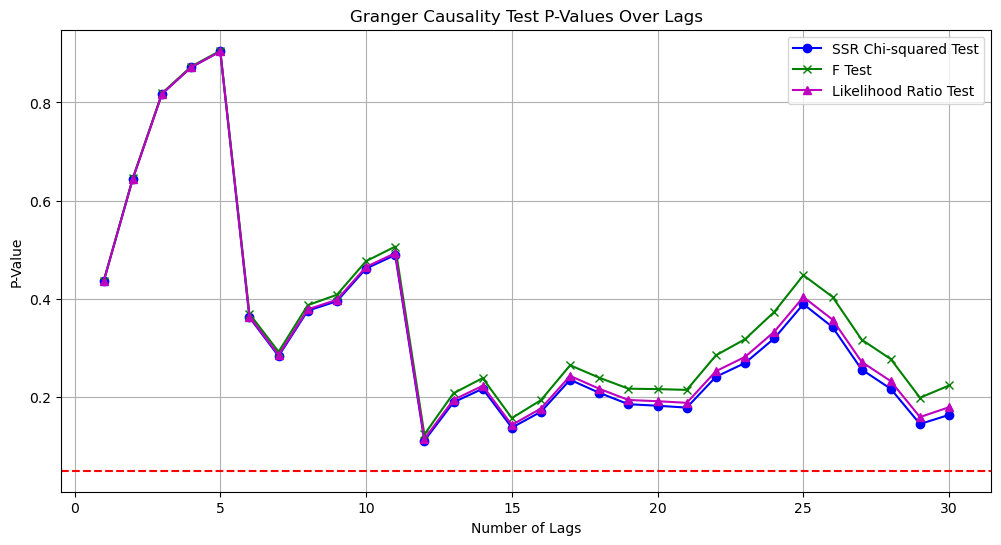

Revenue


c:\Users\helle\anaconda3\envs\doron_env\Lib\site-packages\statsmodels\tsa\stattools.py:1488: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(


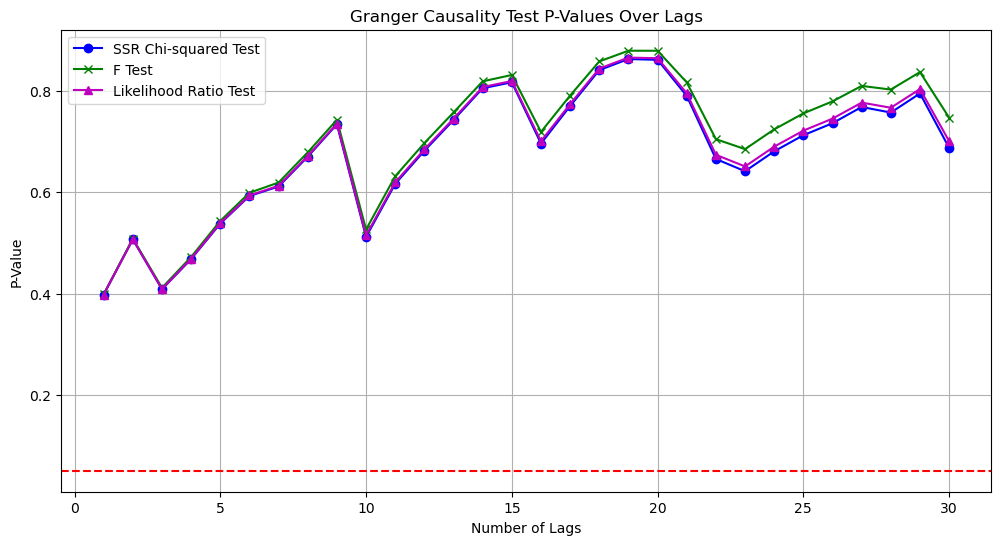

Net Income


c:\Users\helle\anaconda3\envs\doron_env\Lib\site-packages\statsmodels\tsa\stattools.py:1488: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(


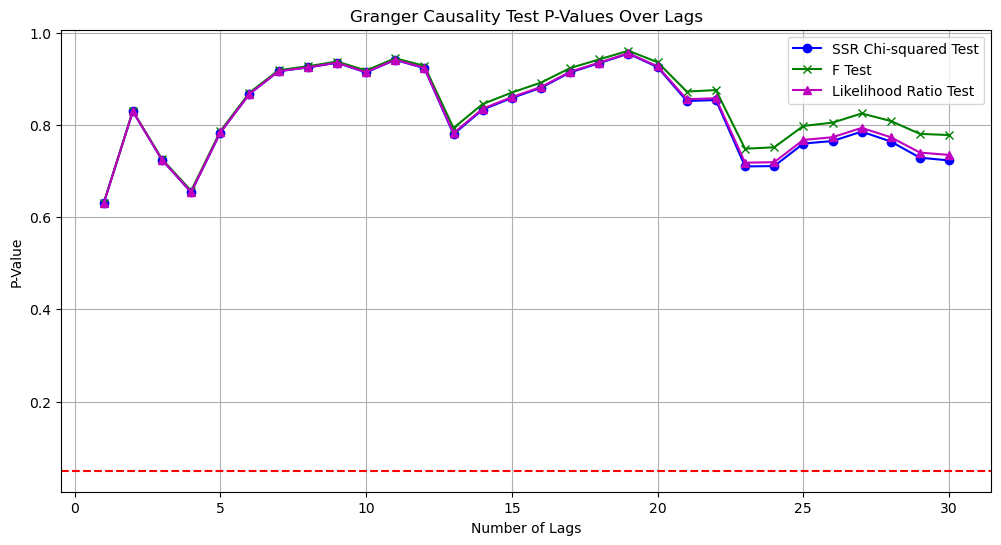

S&P 500


c:\Users\helle\anaconda3\envs\doron_env\Lib\site-packages\statsmodels\tsa\stattools.py:1488: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(


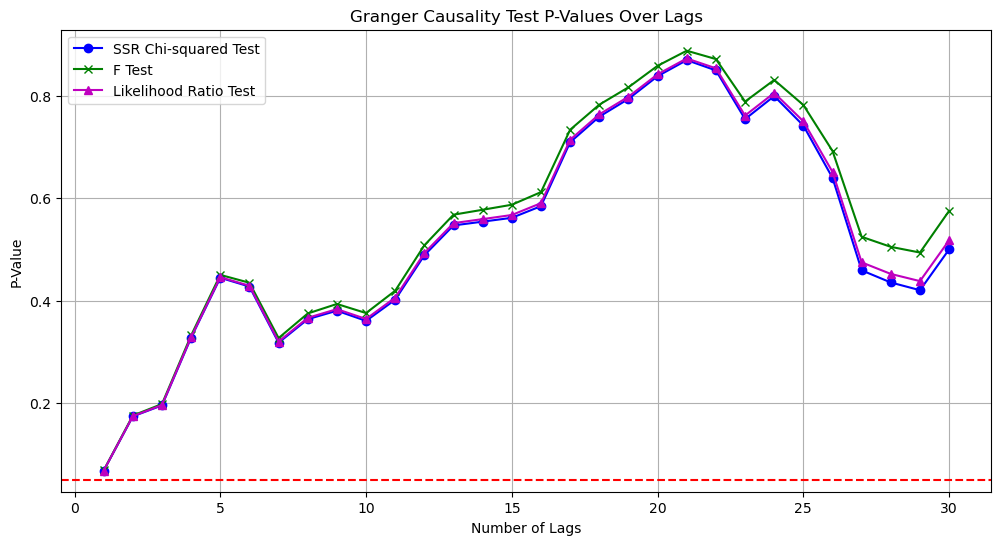

XAL


c:\Users\helle\anaconda3\envs\doron_env\Lib\site-packages\statsmodels\tsa\stattools.py:1488: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(


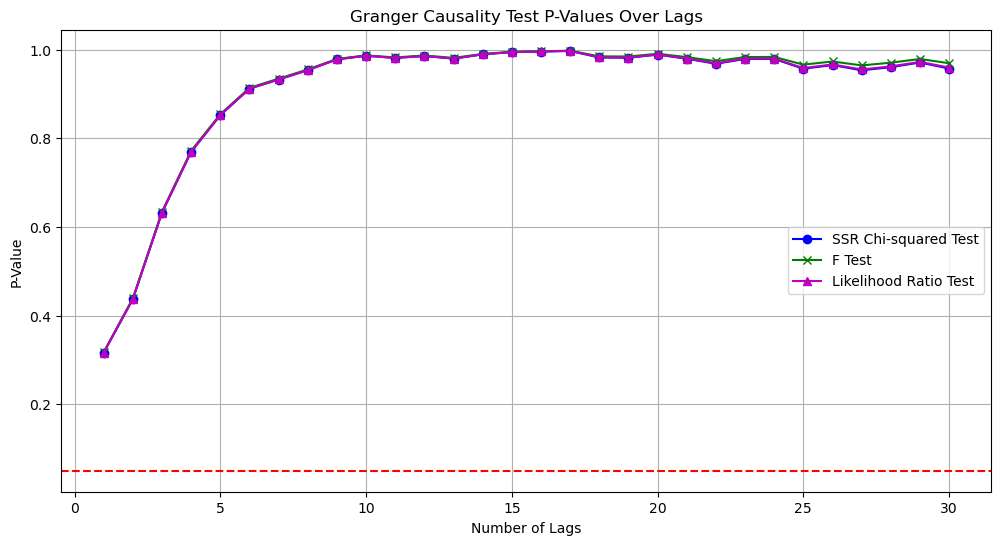

Granger causality F-test. H_0: ['Crude Oil Price', 'Jet Fuel Price', 'Revenue', 'Net Income', 'S&P 500', 'XAL'] do not Granger-cause Close. Conclusion: fail to reject H_0 at 5% significance level.
Test statistic Critical value p-value     df   
-----------------------------------------------
         2.011          2.100   0.061 (6, 8925)
-----------------------------------------------


In [84]:
from statsmodels.tsa.stattools import grangercausalitytests
from statsmodels.tsa.api import VAR


feature_columns = [
    'Crude Oil Price',
    'Jet Fuel Price',
    'Revenue',
    'Net Income',
    'S&P 500',
    'XAL'
]

max_lags = 30
for c in feature_columns:
    print(c)
    gc_results = grangercausalitytests(df[['Close', c]], maxlag=max_lags, verbose=False)
    p_values_ssr = [gc_results[i+1][0]['ssr_chi2test'][1] for i in range(max_lags)]
    p_values_f = [gc_results[i+1][0]['params_ftest'][1] for i in range(max_lags)]
    p_values_lr = [gc_results[i+1][0]['lrtest'][1] for i in range(max_lags)]

    # Plotting the p-values
    plt.figure(figsize=(12, 6))
    lags = range(1, max_lags+1)
    plt.plot(lags, p_values_ssr, marker='o', linestyle='-', color='b', label='SSR Chi-squared Test')
    plt.plot(lags, p_values_f, marker='x', linestyle='-', color='g', label='F Test')
    plt.plot(lags, p_values_lr, marker='^', linestyle='-', color='m', label='Likelihood Ratio Test')
    plt.title('Granger Causality Test P-Values Over Lags')
    plt.xlabel('Number of Lags')
    plt.ylabel('P-Value')
    plt.axhline(y=0.05, color='r', linestyle='--')  # significance level line
    plt.legend()
    plt.grid(True)
    plt.show()

model = VAR(df[['Close', 'Crude Oil Price',
    'Jet Fuel Price',
    'Revenue',
    'Net Income',
    'S&P 500',
        'XAL']])
var_result = model.fit(maxlags=1)
causality_result = var_result.test_causality('Close', ['Crude Oil Price', 'Jet Fuel Price', 'Revenue', 'Net Income', 'S&P 500', 'XAL'], kind='f')

# Print the summary
print(causality_result.summary())

# Prophet

## No external features

### next market day

In [85]:
from prophet import Prophet

In [86]:
x_train = df[df['set'] == 'train'].copy()
y_train = x_train['Close'].copy()

x_test = df[df['set'] == 'test'].copy()
y_test = x_test['Close'].copy()


uni_df = df[['Date', 'Close']].copy()
uni_df_train = x_train[['Date', 'Close']].copy()
uni_df_test = x_test[['Date', 'Close']].copy()

uni_df_train.columns = ['ds', 'y']
uni_df_test.columns = ['ds', 'y']


### prophet without re-fitting

In [87]:
prophet_model = Prophet()
prophet_model.fit(uni_df_train)

y_pred = prophet_model.predict(uni_df_test)

score_mae = np.mean(np.abs(np.array(y_test) - np.array(y_pred['yhat'])))
score_rmse = np.sqrt(np.mean((np.array(y_test) - np.array(y_pred['yhat']))**2))

print(y_pred['yhat'].shape)
print(f'MAE: {score_mae:.2f}')
print(f'RMSE: {score_rmse:.2f}')

12:04:40 - cmdstanpy - INFO - Chain [1] start processing
12:04:40 - cmdstanpy - INFO - Chain [1] done processing


(321,)
MAE: 0.10
RMSE: 0.13


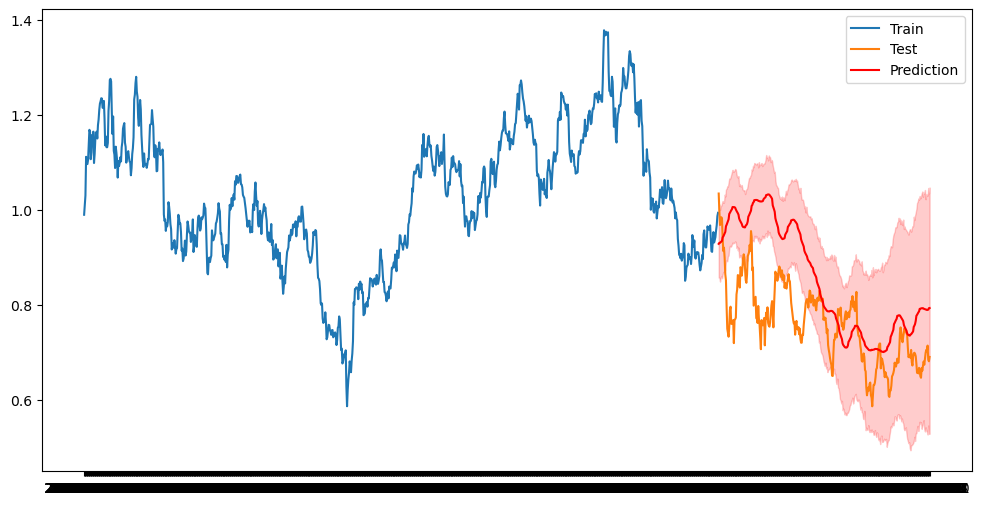

In [88]:
# plot the prediction and actual data, including lower and upper bounds given by prophet

plt.figure(figsize=(12, 6))
plt.plot(uni_df_train['ds'], uni_df_train['y'], label='Train')  
plt.plot(uni_df_test['ds'], uni_df_test['y'], label='Test')
plt.plot(uni_df_test['ds'], y_pred['yhat'], label='Prediction', color='r')
plt.fill_between(uni_df_test['ds'], y_pred['yhat_lower'], y_pred['yhat_upper'], color='r', alpha=0.2)
plt.legend()
plt.show()

### H = 1

12:04:44 - cmdstanpy - INFO - Chain [1] start processing
12:04:45 - cmdstanpy - INFO - Chain [1] done processing
12:04:45 - cmdstanpy - INFO - Chain [1] start processing
12:04:45 - cmdstanpy - INFO - Chain [1] done processing
12:04:45 - cmdstanpy - INFO - Chain [1] start processing
12:04:45 - cmdstanpy - INFO - Chain [1] done processing
12:04:45 - cmdstanpy - INFO - Chain [1] start processing
12:04:46 - cmdstanpy - INFO - Chain [1] done processing
12:04:46 - cmdstanpy - INFO - Chain [1] start processing
12:04:46 - cmdstanpy - INFO - Chain [1] done processing
12:04:46 - cmdstanpy - INFO - Chain [1] start processing
12:04:46 - cmdstanpy - INFO - Chain [1] done processing
12:04:47 - cmdstanpy - INFO - Chain [1] start processing
12:04:47 - cmdstanpy - INFO - Chain [1] done processing
12:04:47 - cmdstanpy - INFO - Chain [1] start processing
12:04:47 - cmdstanpy - INFO - Chain [1] done processing
12:04:47 - cmdstanpy - INFO - Chain [1] start processing
12:04:47 - cmdstanpy - INFO - Chain [1]

RMSE: 0.08341689054029283
MAE: 0.06676872218529306


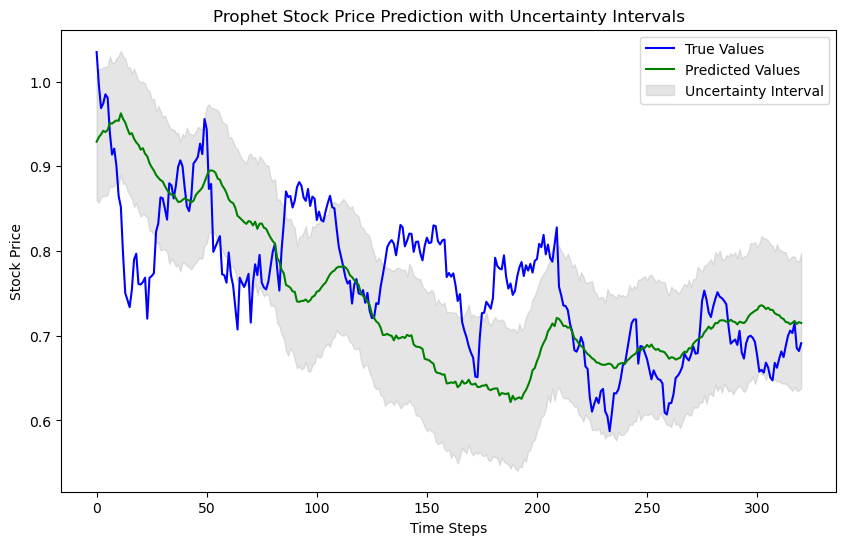

In [ ]:
import pandas as pd
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np
import matplotlib.pyplot as plt

# Ensure uni_df has the correct structure for Prophet
# Prophet requires a dataframe with two columns: 'ds' for date and 'y' for the target value

# Initialize lists to store the predicted values, true values, and the uncertainty intervals
predictions = []
true_values = []
yhat_upper = []
yhat_lower = []

uni_df.rename(columns={"Date": "ds", "Close": "y"}, inplace=True) 

# Initialize the starting point
train_data = uni_df[:len(uni_df_train)].copy()  # Initial train data (adjust as needed)



for i in range(321):  # Example: predict for the next 10 days
    model = Prophet()
    model.fit(train_data)
    
    # Create a dataframe for the next day
    future = model.make_future_dataframe(periods=1, freq='D')
    
    next_day = uni_df.iloc[len(train_data):len(train_data) + 1]
    forecast = model.predict(next_day)
    next_day_prediction = forecast.iloc[-1]['yhat']
    predictions.append(next_day_prediction)
    
    # Get the uncertainty intervals
    yhat_upper.append(forecast.iloc[-1]['yhat_upper'])
    yhat_lower.append(forecast.iloc[-1]['yhat_lower'])
    
    # Get the actual next day value
    actual_next_day = uni_df.iloc[len(train_data)]['y']
    true_values.append(actual_next_day)
    
    # Update train_data to include the actual next day price
    train_data = pd.concat([train_data, uni_df.iloc[len(train_data):len(train_data) + 1]])

# Calculate RMSE and MAE
rmse = np.sqrt(mean_squared_error(true_values, predictions))
mae = mean_absolute_error(true_values, predictions)

print(f"RMSE: {rmse}")
print(f"MAE: {mae}")

# save predictions by date to a csv file

predictions_df = pd.DataFrame({'Date': uni_df['ds'][len(uni_df_train):len(uni_df_train) + 321], 'True Values': true_values, 'Predictions': predictions, 'Upper Bound': yhat_upper, 'Lower Bound': yhat_lower})
predictions_df.to_csv(pred_path + 'prophet_predictions_h1.csv', index=False)

# Plot the predicted vs actual values and uncertainty intervals
plt.figure(figsize=(10, 6))
plt.plot(true_values, label='True Values', color='blue')
plt.plot(predictions, label='Predicted Values', color='green')
plt.fill_between(range(len(predictions)), yhat_lower, yhat_upper, color='gray', alpha=0.2, label='Uncertainty Interval')
plt.legend()
plt.title('Prophet Stock Price Prediction with Uncertainty Intervals')
plt.xlabel('Time Steps')
plt.ylabel('Stock Price')
plt.show()


### Last market day's close price

In [90]:
# check RMSE and MAE for model that predicts the previous day's price

predictions = []
true_values = []

for i in range(321):  # Example: predict for the next 10 days
    next_day_prediction = uni_df.iloc[len(uni_df_train) + i - 1]['y']
    predictions.append(next_day_prediction)
    
    # Get the actual next day value
    actual_next_day = uni_df.iloc[len(uni_df_train) + i]['y']
    true_values.append(actual_next_day)

# Calculate RMSE and MAE
rmse = np.sqrt(mean_squared_error(true_values, predictions))
mae = mean_absolute_error(true_values, predictions)

print(f"RMSE: {rmse}")
print(f"MAE: {mae}")

RMSE: 0.019576349045462755
MAE: 0.014354435674227749


### H = 5, H = 21

18:50:32 - cmdstanpy - INFO - Chain [1] start processing
18:50:32 - cmdstanpy - INFO - Chain [1] done processing
18:50:32 - cmdstanpy - INFO - Chain [1] start processing
18:50:32 - cmdstanpy - INFO - Chain [1] done processing
18:50:33 - cmdstanpy - INFO - Chain [1] start processing
18:50:33 - cmdstanpy - INFO - Chain [1] done processing
18:50:33 - cmdstanpy - INFO - Chain [1] start processing
18:50:33 - cmdstanpy - INFO - Chain [1] done processing
18:50:33 - cmdstanpy - INFO - Chain [1] start processing
18:50:33 - cmdstanpy - INFO - Chain [1] done processing
18:50:34 - cmdstanpy - INFO - Chain [1] start processing
18:50:34 - cmdstanpy - INFO - Chain [1] done processing
18:50:34 - cmdstanpy - INFO - Chain [1] start processing
18:50:34 - cmdstanpy - INFO - Chain [1] done processing
18:50:34 - cmdstanpy - INFO - Chain [1] start processing
18:50:34 - cmdstanpy - INFO - Chain [1] done processing
18:50:35 - cmdstanpy - INFO - Chain [1] start processing
18:50:35 - cmdstanpy - INFO - Chain [1]

RMSE: 0.0949364107081568
MAE: 0.07555777841664772


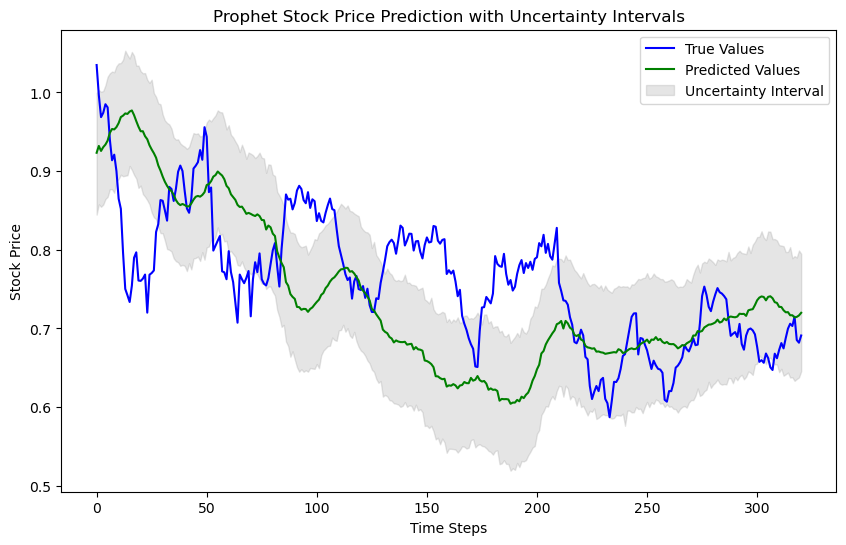

In [ ]:
import pandas as pd
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np
import matplotlib.pyplot as plt

# Ensure uni_df has the correct structure for Prophet
# Prophet requires a dataframe with two columns: 'ds' for date and 'y' for the target value

# Initialize lists to store the predicted values, true values, and the uncertainty intervals
predictions = []
true_values = []
yhat_upper = []
yhat_lower = []


# Initialize the starting point
train_data = uni_df[:(len(uni_df_train) - 4)].copy()  # Initial train data (adjust as needed)



for i in range(321):  # Example: predict for the next 10 days
    model = Prophet()
    model.fit(train_data)
    
    # Create a dataframe for the next day
    future = model.make_future_dataframe(periods=1, freq='D')
    
    next_day = uni_df.iloc[len(train_data) + 4:len(train_data) + 5]
    forecast = model.predict(next_day)
    next_day_prediction = forecast.iloc[-1]['yhat']
    predictions.append(next_day_prediction)
    
    # Get the uncertainty intervals
    yhat_upper.append(forecast.iloc[-1]['yhat_upper'])
    yhat_lower.append(forecast.iloc[-1]['yhat_lower'])
    
    # Get the actual next day value
    actual_next_day = uni_df.iloc[len(train_data) + 4]['y']
    true_values.append(actual_next_day)
    
    # Update train_data to include the actual next day price
    train_data = pd.concat([train_data, uni_df.iloc[len(train_data):len(train_data) + 1]])

# Calculate RMSE and MAE
rmse = np.sqrt(mean_squared_error(true_values, predictions))
mae = mean_absolute_error(true_values, predictions)

print(f"RMSE: {rmse}")
print(f"MAE: {mae}")


predictions_df = pd.DataFrame({'Date': uni_df['ds'][len(uni_df_train):len(uni_df_train) + 321], 'True Values': true_values, 'Predictions': predictions, 'Upper Bound': yhat_upper, 'Lower Bound': yhat_lower})
predictions_df.to_csv(pred_path + 'prophet_predictions_h5.csv', index=False)

# Plot the predicted vs actual values and uncertainty intervals
plt.figure(figsize=(10, 6))
plt.plot(true_values, label='True Values', color='blue')
plt.plot(predictions, label='Predicted Values', color='green')
plt.fill_between(range(len(predictions)), yhat_lower, yhat_upper, color='gray', alpha=0.2, label='Uncertainty Interval')
plt.legend()
plt.title('Prophet Stock Price Prediction with Uncertainty Intervals')
plt.xlabel('Time Steps')
plt.ylabel('Stock Price')
plt.show()


18:52:51 - cmdstanpy - INFO - Chain [1] start processing
18:52:51 - cmdstanpy - INFO - Chain [1] done processing
18:52:51 - cmdstanpy - INFO - Chain [1] start processing
18:52:51 - cmdstanpy - INFO - Chain [1] done processing
18:52:52 - cmdstanpy - INFO - Chain [1] start processing
18:52:52 - cmdstanpy - INFO - Chain [1] done processing
18:52:52 - cmdstanpy - INFO - Chain [1] start processing
18:52:52 - cmdstanpy - INFO - Chain [1] done processing
18:52:52 - cmdstanpy - INFO - Chain [1] start processing
18:52:53 - cmdstanpy - INFO - Chain [1] done processing
18:52:53 - cmdstanpy - INFO - Chain [1] start processing
18:52:53 - cmdstanpy - INFO - Chain [1] done processing
18:52:53 - cmdstanpy - INFO - Chain [1] start processing
18:52:53 - cmdstanpy - INFO - Chain [1] done processing
18:52:54 - cmdstanpy - INFO - Chain [1] start processing
18:52:54 - cmdstanpy - INFO - Chain [1] done processing
18:52:54 - cmdstanpy - INFO - Chain [1] start processing
18:52:55 - cmdstanpy - INFO - Chain [1]

RMSE: 0.11659281099914384
MAE: 0.0925577493244189


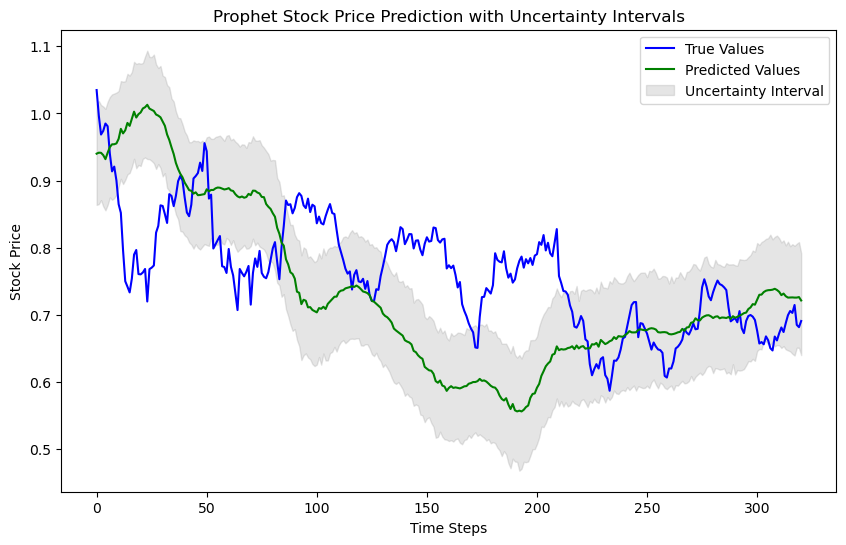

In [ ]:
import pandas as pd
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np
import matplotlib.pyplot as plt

# Ensure uni_df has the correct structure for Prophet
# Prophet requires a dataframe with two columns: 'ds' for date and 'y' for the target value

# Initialize lists to store the predicted values, true values, and the uncertainty intervals
predictions = []
true_values = []
yhat_upper = []
yhat_lower = []


# Initialize the starting point
train_data = uni_df[:(len(uni_df_train) - 20)].copy()  # Initial train data (adjust as needed)



for i in range(321):  # Example: predict for the next 10 days
    model = Prophet()
    model.fit(train_data)
    
    # Create a dataframe for the next day
    future = model.make_future_dataframe(periods=1, freq='D')
    
    next_day = uni_df.iloc[len(train_data) + 20:len(train_data) + 21]
    forecast = model.predict(next_day)
    next_day_prediction = forecast.iloc[-1]['yhat']
    predictions.append(next_day_prediction)
    
    # Get the uncertainty intervals
    yhat_upper.append(forecast.iloc[-1]['yhat_upper'])
    yhat_lower.append(forecast.iloc[-1]['yhat_lower'])
    
    # Get the actual next day value
    actual_next_day = uni_df.iloc[len(train_data) + 20]['y']
    true_values.append(actual_next_day)
    
    # Update train_data to include the actual next day price
    train_data = pd.concat([train_data, uni_df.iloc[len(train_data):len(train_data) + 1]])

# Calculate RMSE and MAE
rmse = np.sqrt(mean_squared_error(true_values, predictions))
mae = mean_absolute_error(true_values, predictions)

print(f"RMSE: {rmse}")
print(f"MAE: {mae}")


predictions_df = pd.DataFrame({'Date': uni_df['ds'][len(uni_df_train):len(uni_df_train) + 321], 'True Values': true_values, 'Predictions': predictions, 'Upper Bound': yhat_upper, 'Lower Bound': yhat_lower})
predictions_df.to_csv(pred_path + 'prophet_predictions_h21.csv', index=False)

# Plot the predicted vs actual values and uncertainty intervals
plt.figure(figsize=(10, 6))
plt.plot(true_values, label='True Values', color='blue')
plt.plot(predictions, label='Predicted Values', color='green')
plt.fill_between(range(len(predictions)), yhat_lower, yhat_upper, color='gray', alpha=0.2, label='Uncertainty Interval')
plt.legend()
plt.title('Prophet Stock Price Prediction with Uncertainty Intervals')
plt.xlabel('Time Steps')
plt.ylabel('Stock Price')
plt.show()


## Exogenous features

In [76]:
# remove set feature from x_train and x_test
x_train.drop(columns=['set'], inplace=True)
x_test.drop(columns=['set'], inplace=True)

### H = 1

18:55:08 - cmdstanpy - INFO - Chain [1] start processing
18:55:08 - cmdstanpy - INFO - Chain [1] done processing
18:55:09 - cmdstanpy - INFO - Chain [1] start processing
18:55:09 - cmdstanpy - INFO - Chain [1] done processing
18:55:09 - cmdstanpy - INFO - Chain [1] start processing
18:55:09 - cmdstanpy - INFO - Chain [1] done processing
18:55:10 - cmdstanpy - INFO - Chain [1] start processing
18:55:10 - cmdstanpy - INFO - Chain [1] done processing
18:55:10 - cmdstanpy - INFO - Chain [1] start processing
18:55:11 - cmdstanpy - INFO - Chain [1] done processing
18:55:11 - cmdstanpy - INFO - Chain [1] start processing
18:55:12 - cmdstanpy - INFO - Chain [1] done processing
18:55:12 - cmdstanpy - INFO - Chain [1] start processing
18:55:12 - cmdstanpy - INFO - Chain [1] done processing
18:55:13 - cmdstanpy - INFO - Chain [1] start processing
18:55:13 - cmdstanpy - INFO - Chain [1] done processing
18:55:14 - cmdstanpy - INFO - Chain [1] start processing
18:55:14 - cmdstanpy - INFO - Chain [1]

MAE: 0.0371669236878607
RMSE: 0.04454061597061319


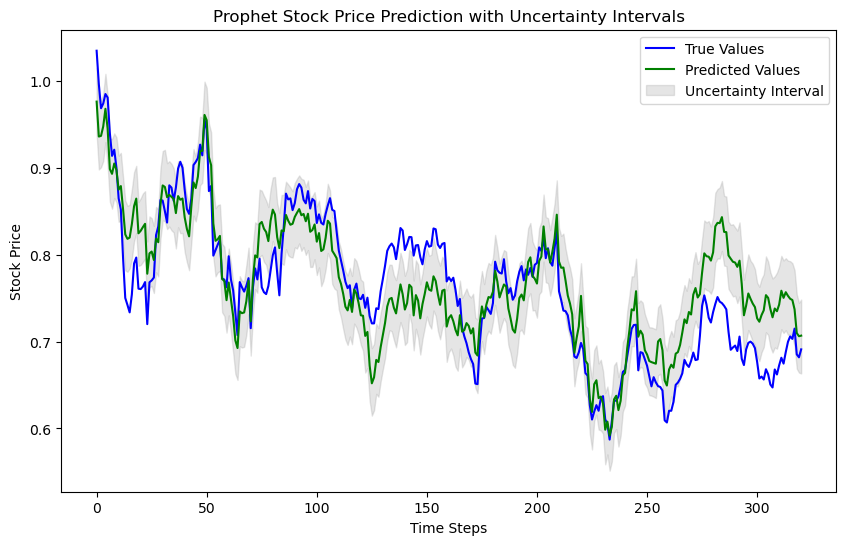

In [ ]:
shifted_df = df.copy().shift(-1)
shifted_df = shifted_df.dropna()

x_train_shifted = shifted_df[shifted_df['set'] == 'train'].copy()
x_test_shifted = shifted_df[shifted_df['set'] == 'test'].copy()


x_train_shifted.drop(columns=['set'], inplace=True)
x_test_shifted.drop(columns=['set'], inplace=True)

x_train_shifted.columns = ['ds', 'y', 'Crude Oil Price', 'Jet Fuel Price', 'Revenue', 'Net Income', 'S&P 500', 'XAL']
x_test_shifted.columns = ['ds', 'y', 'Crude Oil Price', 'Jet Fuel Price', 'Revenue', 'Net Income', 'S&P 500', 'XAL']


# predict next price and fit the model on the test data that passed

predictions = []
true_values = []
yhat_upper = []
yhat_lower = []

for i in range(321):  # Example: predict for the next 10 days

    pred_day = i
    model = Prophet()
    model.add_regressor('Crude Oil Price')
    model.add_regressor('Jet Fuel Price')
    model.add_regressor('Revenue')
    model.add_regressor('Net Income')
    model.add_regressor('S&P 500')
    model.add_regressor('XAL')


    model.fit(x_train_shifted)
    
    # Create a dataframe for the next day
    future = model.make_future_dataframe(periods=1, freq='D')
    
    next_day = x_test_shifted.iloc[pred_day:pred_day+1]
    forecast = model.predict(next_day)
    next_day_prediction = forecast.iloc[-1]['yhat']
    predictions.append(next_day_prediction)
    
    # Get the uncertainty intervals
    yhat_upper.append(forecast.iloc[-1]['yhat_upper'])
    yhat_lower.append(forecast.iloc[-1]['yhat_lower'])
    
    # Get the actual next day value
    actual_next_day = x_test_shifted.iloc[pred_day]['y']
    true_values.append(actual_next_day)
    
    # Update train_data to include the actual next day price
    x_train_shifted = pd.concat([x_train_shifted, x_test_shifted.iloc[i:i+1]])

# Calculate RMSE and MAE
rmse = np.sqrt(mean_squared_error(true_values, predictions))
mae = mean_absolute_error(true_values, predictions)

print(f"MAE: {mae}")
print(f"RMSE: {rmse}")


predictions_df = pd.DataFrame({'Date': uni_df['ds'][len(uni_df_train):len(uni_df_train) + 321], 'True Values': true_values, 'Predictions': predictions, 'Upper Bound': yhat_upper, 'Lower Bound': yhat_lower})
predictions_df.to_csv(pred_path + 'prophet_predictions_h1_exo.csv', index=False)

# Plot the predicted vs actual values and uncertainty intervals
plt.figure(figsize=(10, 6))
plt.plot(true_values, label='True Values', color='blue')
plt.plot(predictions, label='Predicted Values', color='green')
plt.fill_between(range(len(predictions)), yhat_lower, yhat_upper, color='gray', alpha=0.2, label='Uncertainty Interval')
plt.legend()
plt.title('Prophet Stock Price Prediction with Uncertainty Intervals')
plt.xlabel('Time Steps')
plt.ylabel('Stock Price')
plt.show()


### H = 5

18:58:45 - cmdstanpy - INFO - Chain [1] start processing
18:58:45 - cmdstanpy - INFO - Chain [1] done processing
18:58:46 - cmdstanpy - INFO - Chain [1] start processing
18:58:46 - cmdstanpy - INFO - Chain [1] done processing
18:58:46 - cmdstanpy - INFO - Chain [1] start processing
18:58:46 - cmdstanpy - INFO - Chain [1] done processing
18:58:47 - cmdstanpy - INFO - Chain [1] start processing
18:58:47 - cmdstanpy - INFO - Chain [1] done processing
18:58:47 - cmdstanpy - INFO - Chain [1] start processing
18:58:47 - cmdstanpy - INFO - Chain [1] done processing
18:58:48 - cmdstanpy - INFO - Chain [1] start processing
18:58:48 - cmdstanpy - INFO - Chain [1] done processing
18:58:48 - cmdstanpy - INFO - Chain [1] start processing
18:58:48 - cmdstanpy - INFO - Chain [1] done processing
18:58:49 - cmdstanpy - INFO - Chain [1] start processing
18:58:49 - cmdstanpy - INFO - Chain [1] done processing
18:58:49 - cmdstanpy - INFO - Chain [1] start processing
18:58:50 - cmdstanpy - INFO - Chain [1]

MAE: 0.043741483682939515
RMSE: 0.0523430338757703


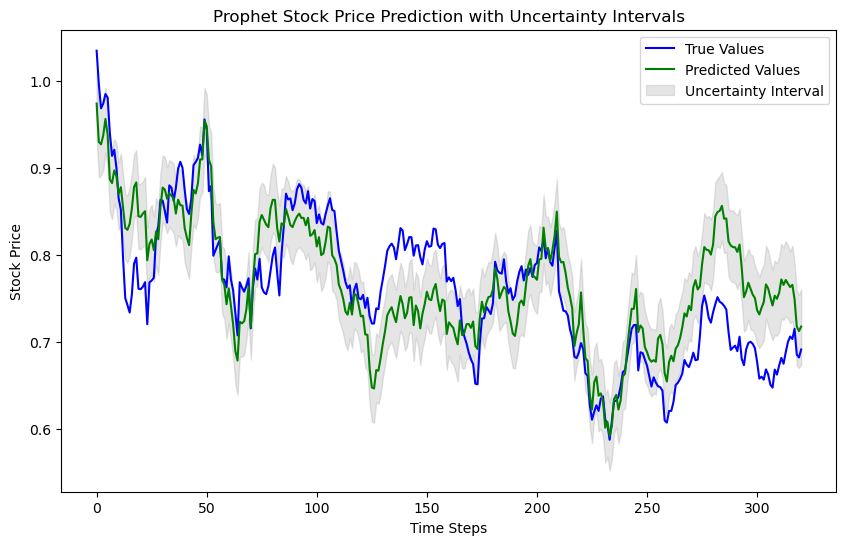

In [ ]:
shifted_df = df.copy().shift(-5)
shifted_df = shifted_df.dropna()

x_train_shifted = shifted_df[shifted_df['set'] == 'train'].copy()
x_test_shifted = shifted_df[shifted_df['set'] == 'test'].copy()

# mover last 21 days of train to test
x_test_shifted = pd.concat([x_train_shifted.iloc[-4:], x_test_shifted])
x_train_shifted = x_train_shifted.iloc[:-4]


x_train_shifted.drop(columns=['set'], inplace=True)
x_test_shifted.drop(columns=['set'], inplace=True)

x_train_shifted.columns = ['ds', 'y', 'Crude Oil Price', 'Jet Fuel Price', 'Revenue', 'Net Income', 'S&P 500', 'XAL']
x_test_shifted.columns = ['ds', 'y', 'Crude Oil Price', 'Jet Fuel Price', 'Revenue', 'Net Income', 'S&P 500', 'XAL']


# predict next price and fit the model on the test data that passed

predictions = []
true_values = []
yhat_upper = []
yhat_lower = []

for i in range(321):  # Example: predict for the next 10 days

    pred_day = i + 4
    model = Prophet()
    model.add_regressor('Crude Oil Price')
    model.add_regressor('Jet Fuel Price')
    model.add_regressor('Revenue')
    model.add_regressor('Net Income')
    model.add_regressor('S&P 500')
    model.add_regressor('XAL')


    model.fit(x_train_shifted)
    
    # Create a dataframe for the next day
    future = model.make_future_dataframe(periods=1, freq='D')
    
    next_day = x_test_shifted.iloc[pred_day:pred_day+1]
    forecast = model.predict(next_day)
    next_day_prediction = forecast.iloc[-1]['yhat']
    predictions.append(next_day_prediction)
    
    # Get the uncertainty intervals
    yhat_upper.append(forecast.iloc[-1]['yhat_upper'])
    yhat_lower.append(forecast.iloc[-1]['yhat_lower'])
    
    # Get the actual next day value
    actual_next_day = x_test_shifted.iloc[pred_day]['y']
    true_values.append(actual_next_day)
    
    # Update train_data to include the actual next day price
    x_train_shifted = pd.concat([x_train_shifted, x_test_shifted.iloc[i:i+1]])

# Calculate RMSE and MAE
rmse = np.sqrt(mean_squared_error(true_values, predictions))
mae = mean_absolute_error(true_values, predictions)

print(f"MAE: {mae}")
print(f"RMSE: {rmse}")


predictions_df = pd.DataFrame({'Date': uni_df['ds'][len(uni_df_train):len(uni_df_train) + 321], 'True Values': true_values, 'Predictions': predictions, 'Upper Bound': yhat_upper, 'Lower Bound': yhat_lower})
predictions_df.to_csv(pred_path + 'prophet_predictions_h5_exo.csv', index=False)


# Plot the predicted vs actual values and uncertainty intervals
plt.figure(figsize=(10, 6))
plt.plot(true_values, label='True Values', color='blue')
plt.plot(predictions, label='Predicted Values', color='green')
plt.fill_between(range(len(predictions)), yhat_lower, yhat_upper, color='gray', alpha=0.2, label='Uncertainty Interval')
plt.legend()
plt.title('Prophet Stock Price Prediction with Uncertainty Intervals')
plt.xlabel('Time Steps')
plt.ylabel('Stock Price')
plt.show()


### H = 21

19:02:13 - cmdstanpy - INFO - Chain [1] start processing
19:02:13 - cmdstanpy - INFO - Chain [1] done processing
19:02:13 - cmdstanpy - INFO - Chain [1] start processing
19:02:14 - cmdstanpy - INFO - Chain [1] done processing
19:02:14 - cmdstanpy - INFO - Chain [1] start processing
19:02:14 - cmdstanpy - INFO - Chain [1] done processing
19:02:14 - cmdstanpy - INFO - Chain [1] start processing
19:02:15 - cmdstanpy - INFO - Chain [1] done processing
19:02:15 - cmdstanpy - INFO - Chain [1] start processing
19:02:15 - cmdstanpy - INFO - Chain [1] done processing
19:02:15 - cmdstanpy - INFO - Chain [1] start processing
19:02:15 - cmdstanpy - INFO - Chain [1] done processing
19:02:16 - cmdstanpy - INFO - Chain [1] start processing
19:02:16 - cmdstanpy - INFO - Chain [1] done processing
19:02:16 - cmdstanpy - INFO - Chain [1] start processing
19:02:16 - cmdstanpy - INFO - Chain [1] done processing
19:02:17 - cmdstanpy - INFO - Chain [1] start processing
19:02:17 - cmdstanpy - INFO - Chain [1]

MAE: 0.055497129867163084
RMSE: 0.068328486955879


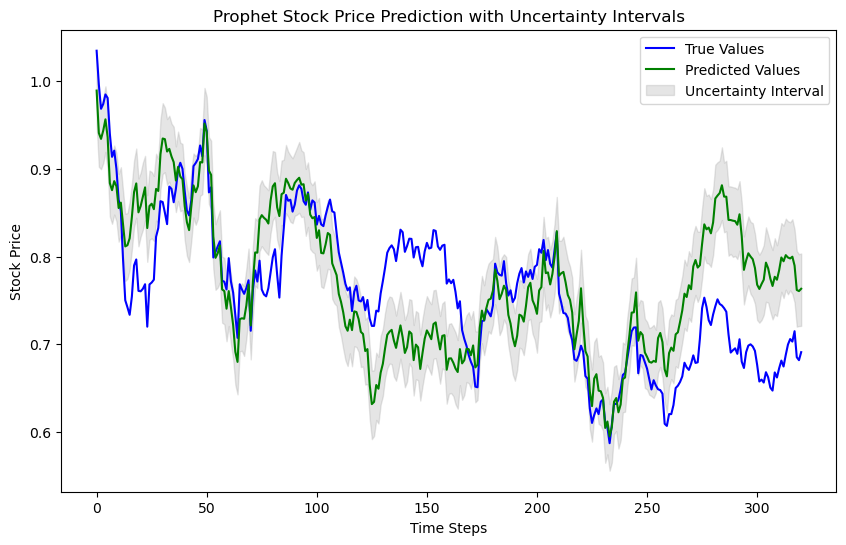

In [ ]:
shifted_df = df.copy().shift(-21)
shifted_df = shifted_df.dropna()

x_train_shifted = shifted_df[shifted_df['set'] == 'train'].copy()
x_test_shifted = shifted_df[shifted_df['set'] == 'test'].copy()

# mover last 21 days of train to test
x_test_shifted = pd.concat([x_train_shifted.iloc[-20:], x_test_shifted])
x_train_shifted = x_train_shifted.iloc[:-20]


x_train_shifted.drop(columns=['set'], inplace=True)
x_test_shifted.drop(columns=['set'], inplace=True)

x_train_shifted.columns = ['ds', 'y', 'Crude Oil Price', 'Jet Fuel Price', 'Revenue', 'Net Income', 'S&P 500', 'XAL']
x_test_shifted.columns = ['ds', 'y', 'Crude Oil Price', 'Jet Fuel Price', 'Revenue', 'Net Income', 'S&P 500', 'XAL']


# predict next price and fit the model on the test data that passed

predictions = []
true_values = []
yhat_upper = []
yhat_lower = []

for i in range(321):  # Example: predict for the next 10 days

    pred_day = i + 20
    model = Prophet()
    model.add_regressor('Crude Oil Price')
    model.add_regressor('Jet Fuel Price')
    model.add_regressor('Revenue')
    model.add_regressor('Net Income')
    model.add_regressor('S&P 500')
    model.add_regressor('XAL')


    model.fit(x_train_shifted)
    
    # Create a dataframe for the next day
    future = model.make_future_dataframe(periods=1, freq='D')
    
    next_day = x_test_shifted.iloc[pred_day:pred_day+1]
    forecast = model.predict(next_day)
    next_day_prediction = forecast.iloc[-1]['yhat']
    predictions.append(next_day_prediction)
    
    # Get the uncertainty intervals
    yhat_upper.append(forecast.iloc[-1]['yhat_upper'])
    yhat_lower.append(forecast.iloc[-1]['yhat_lower'])
    
    # Get the actual next day value
    actual_next_day = x_test_shifted.iloc[pred_day]['y']
    true_values.append(actual_next_day)
    
    # Update train_data to include the actual next day price
    x_train_shifted = pd.concat([x_train_shifted, x_test_shifted.iloc[i:i+1]])

# Calculate RMSE and MAE
rmse = np.sqrt(mean_squared_error(true_values, predictions))
mae = mean_absolute_error(true_values, predictions)

print(f"MAE: {mae}")
print(f"RMSE: {rmse}")


predictions_df = pd.DataFrame({'Date': uni_df['ds'][len(uni_df_train):len(uni_df_train) + 321], 'True Values': true_values, 'Predictions': predictions, 'Upper Bound': yhat_upper, 'Lower Bound': yhat_lower})
predictions_df.to_csv(pred_path + 'prophet_predictions_h21_exo.csv', index=False)

# Plot the predicted vs actual values and uncertainty intervals
plt.figure(figsize=(10, 6))
plt.plot(true_values, label='True Values', color='blue')
plt.plot(predictions, label='Predicted Values', color='green')
plt.fill_between(range(len(predictions)), yhat_lower, yhat_upper, color='gray', alpha=0.2, label='Uncertainty Interval')
plt.legend()
plt.title('Prophet Stock Price Prediction with Uncertainty Intervals')
plt.xlabel('Time Steps')
plt.ylabel('Stock Price')
plt.show()
